In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
%matplotlib inline

In [2]:
cd G:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

G:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


In [3]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.drop('kd', axis = 1)
df = df.dropna()

phase_0 = df.loc[df['phase'] == 0, :].copy()
X = phase_0.drop(['fluors', 'phase'], axis = 1).copy()
y = phase_0['fluors'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# standardize the data
scaler = StandardScaler()
# train the scaler on the training data
X_train = scaler.fit_transform(X_train)
# apply the scaler to the test data sets
X_test = scaler.transform(X_test)
X = scaler.transform(X)

phase_1 = df.loc[df['phase'] > 0, :].copy()
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1).copy()
y_1 = phase_1.loc[:, 'fluors'].copy()
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)

In [4]:
ls *.h5

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

04/12/2022  17:55         6,710,880 b2e20_1.h5
04/12/2022  22:10        18,127,424 b3e8_3.h5
04/12/2022  19:46         9,120,624 b6e15_2.h5
28/11/2022  16:52         9,737,336 final_model.h5
08/12/2022  16:17         3,457,984 good_model_b10_e13.h5
08/12/2022  15:02         3,457,984 good_model_b3_e11.h5
02/12/2022  15:55        18,798,920 model.h5
08/12/2022  17:31            34,728 model_for_visualisation.h5
               8 File(s)     69,445,880 bytes
               0 Dir(s)  14,693,945,344 bytes free


In [14]:
model = keras.models.load_model('good_model_b10_e13.h5')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 200)               1000      
                                                                 
 dense_73 (Dense)            (None, 450)               90450     
                                                                 
 dropout_36 (Dropout)        (None, 450)               0         
                                                                 
 dense_74 (Dense)            (None, 200)               90200     
                                                                 
 dense_75 (Dense)            (None, 100)               20100     
                                                                 
 dropout_37 (Dropout)        (None, 100)               0         
                                                                 
 dense_76 (Dense)            (None, 800)             

In [15]:
pred_train = model.predict(X_train)
print(f'Training RMS error: {np.sqrt(mean_squared_error(y_train, pred_train)):.2f}')
pred_test = model.predict(X_test)
print(f'Test RMS error {np.sqrt(mean_squared_error(y_test, pred_test)):.2f}')
fluors_pred = model.predict(X)
print(f'Overall pre-construction RMS error: {np.sqrt(mean_squared_error(y, fluors_pred)):.2f}')
fluors_pred_1 = model.predict(X_1)
print(f'Overall post-construction RMS error {np.sqrt(mean_squared_error(y_1, fluors_pred_1)):.2f}')

phase_0.loc[:, 'fluors_pred'] = fluors_pred
phase_1.loc[:, 'fluors_pred'] = fluors_pred_1

#phase_0.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_0_predictions.csv', index = 'false', sep = ',')
#phase_1.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_1_predictions.csv', index = 'false', sep = ',')


940/940 [==============================] - 4s 4ms/step
Training RMS error: 1.16
403/403 [==============================] - 2s 4ms/step
Test RMS error 1.16
1343/1343 [==============================] - 5s 3ms/step
Overall pre-construction RMS error: 1.16
1904/1904 [==============================] - 7s 4ms/step
Overall post-construction RMS error 1.69


C:\Users\Reuben\AppData\Local\Temp\ipykernel_9292\1370620441.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


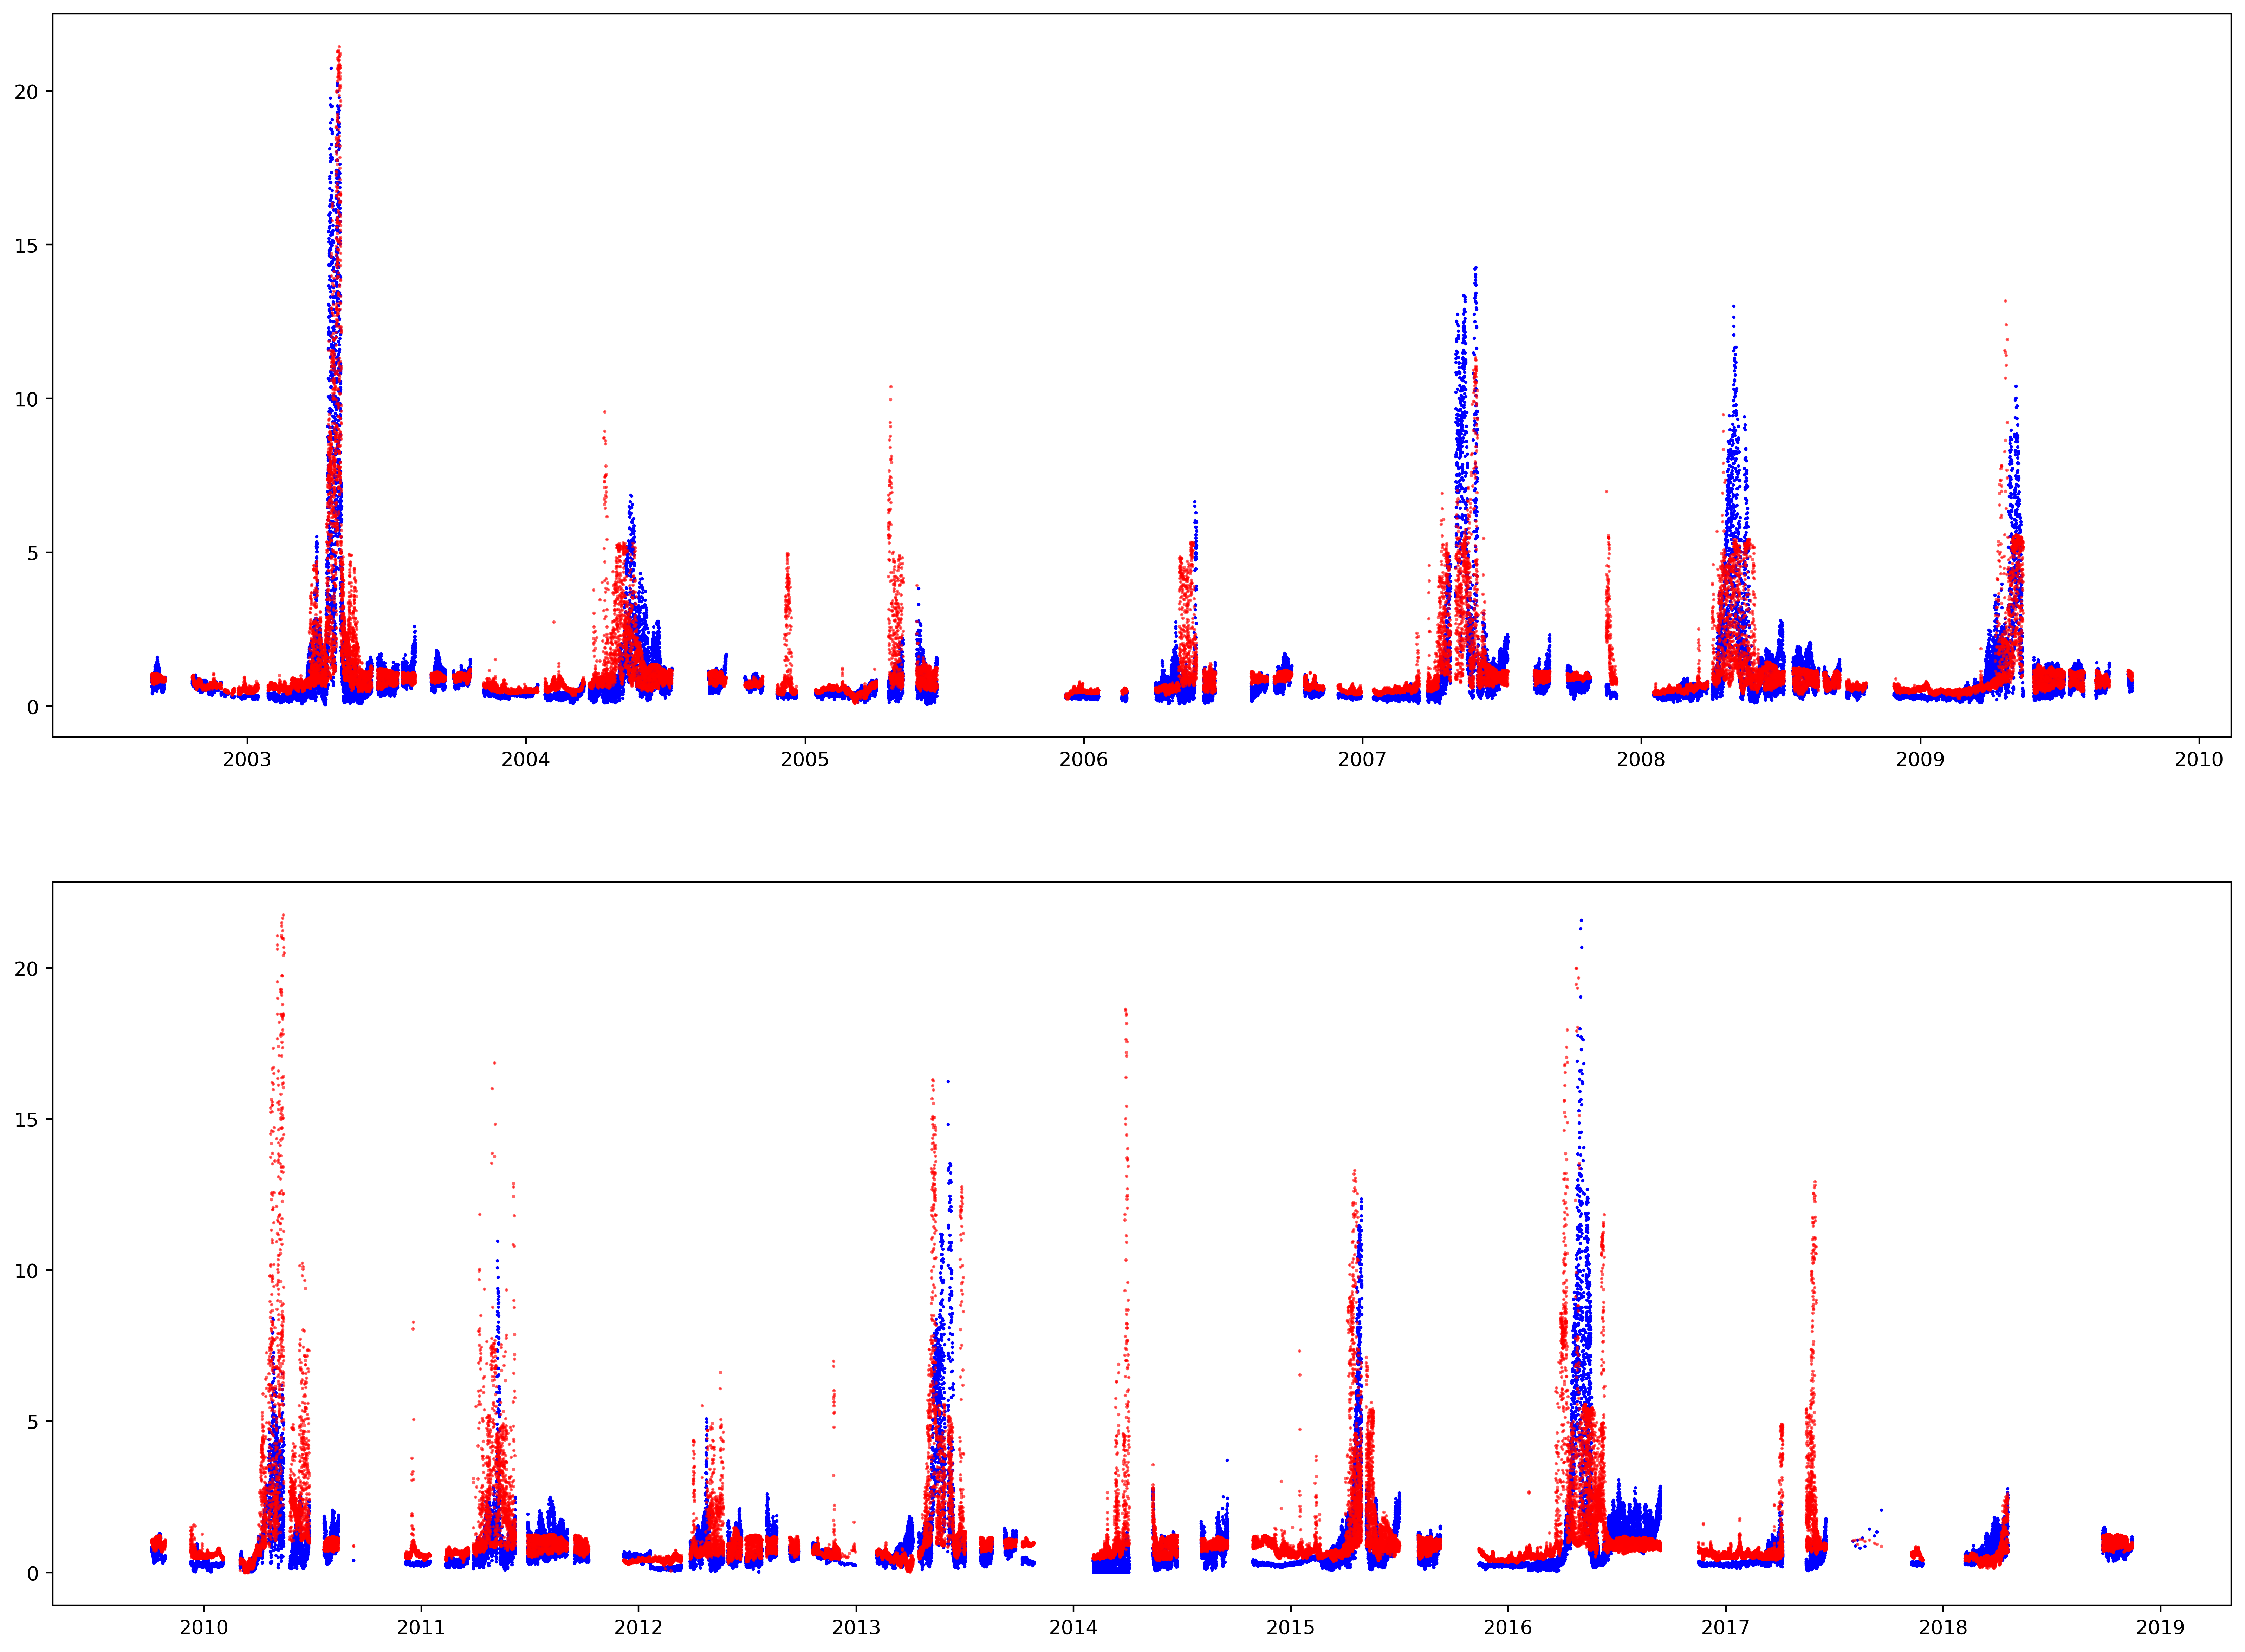

In [13]:
fig, ax = plt.subplots(2,1, figsize = (20, 15), dpi = 400)
ax[0].scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax[0].scatter(phase_0.index, phase_0['fluors_pred'], s = 0.5, color = 'red', alpha = 0.6)
ax[1].scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax[1].scatter(phase_1.index, phase_1['fluors_pred'], s = 0.5, color = 'red', alpha = 0.6)
fig.savefig('model_predictions.png', dpi = 400)
fig.show()

Lift chart

In [32]:
phase_0

,sal,ftu,fluors,surf_temp,direct_solar,phase,fluors_pred
dateTime,,,,,,,
2002-08-28 14:00:00,34.66125,6.0425,0.6500,18.728,2.048638e+06,0,0.867771
2002-08-28 15:00:00,34.61900,4.2225,0.8100,18.735,1.785222e+06,0,0.887178
2002-08-28 16:00:00,34.62100,2.9675,0.8250,18.772,1.377425e+06,0,0.925336
2002-08-28 17:00:00,34.68925,3.1400,0.9575,18.818,8.836671e+05,0,0.974074
2002-08-28 18:00:00,34.79275,4.8675,0.9175,18.828,3.774992e+05,0,0.984274
...,...,...,...,...,...,...,...
2009-10-04 19:00:00,34.93300,4.0000,0.8250,16.626,0.000000e+00,0,1.075052
2009-10-04 20:00:00,34.91900,3.7400,0.8450,16.635,0.000000e+00,0,1.105451
2009-10-04 21:00:00,34.95000,5.7950,0.7700,16.672,0.000000e+00,0,0.944396


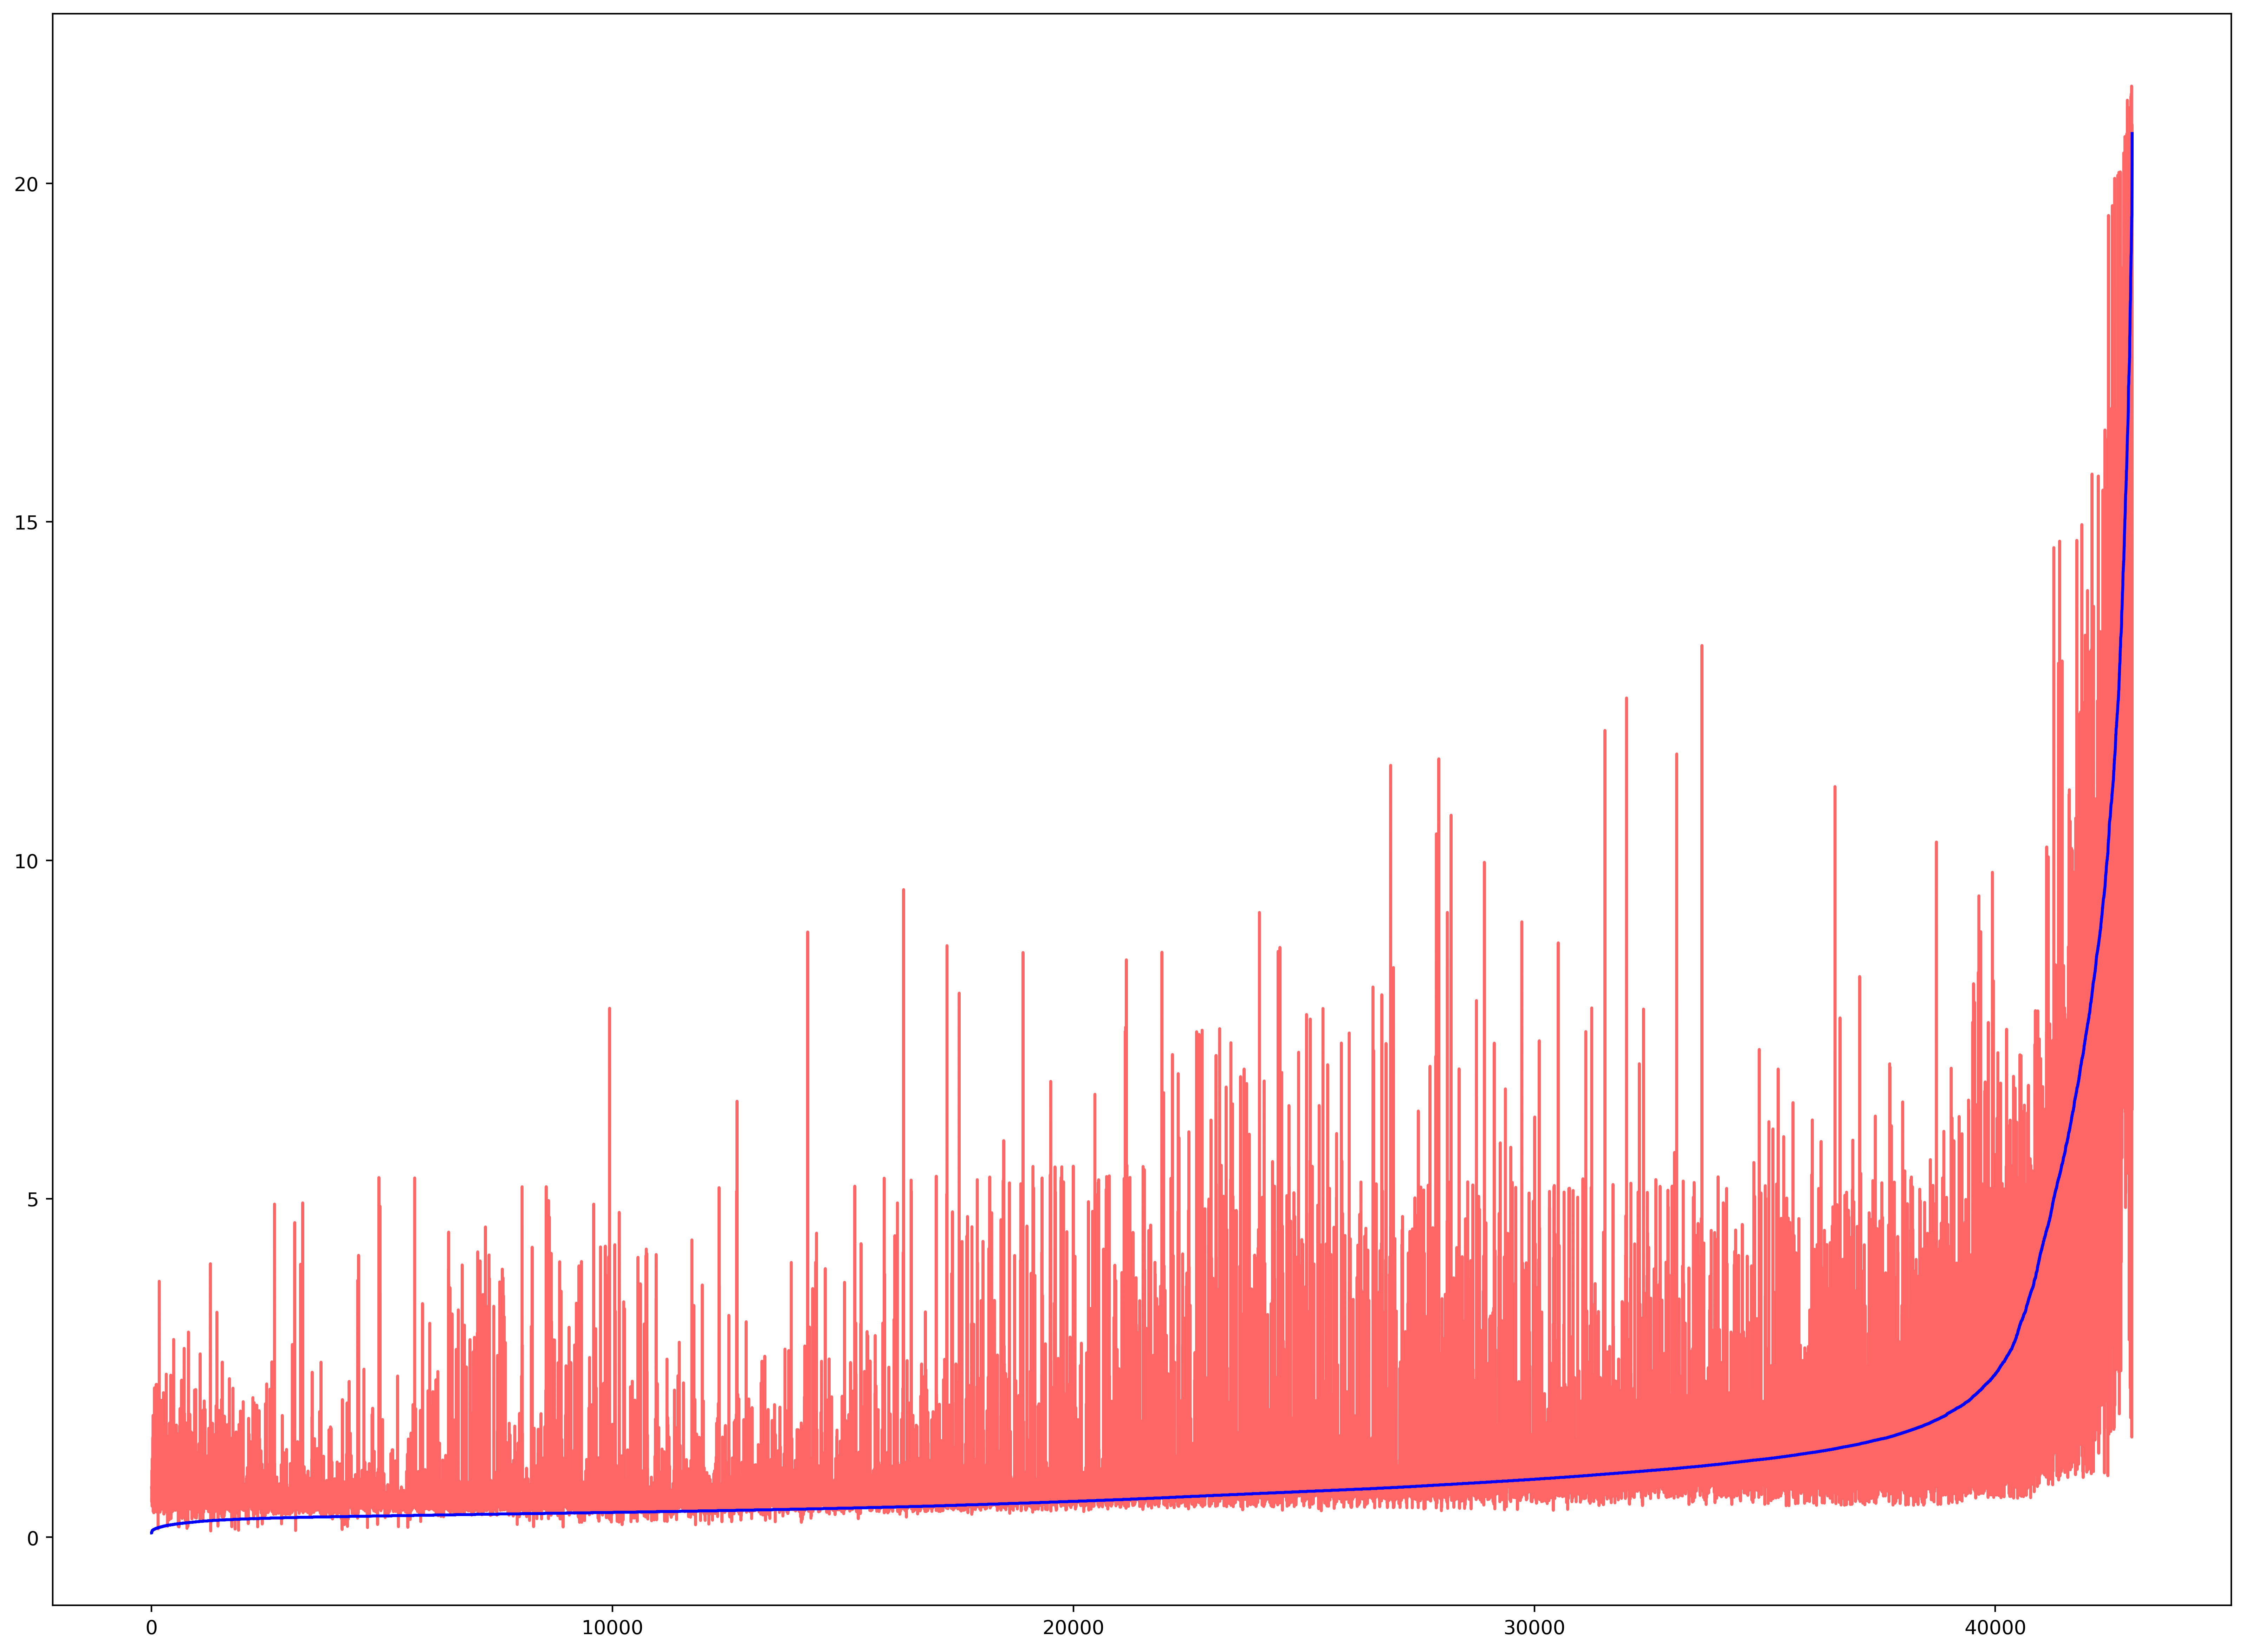

In [17]:
sort = phase_0.sort_values(by = 'fluors', axis = 0).reset_index()

fig, ax = plt.subplots(figsize = (20, 15), dpi = 400)
ax.plot(sort['fluors_pred'], color = 'red', alpha = 0.6)
ax.plot(sort['fluors'], color = 'blue')